In [1]:
import numpy as np
import sympy as sp
import wpp3
import matplotlib.pyplot as plt
import timeit

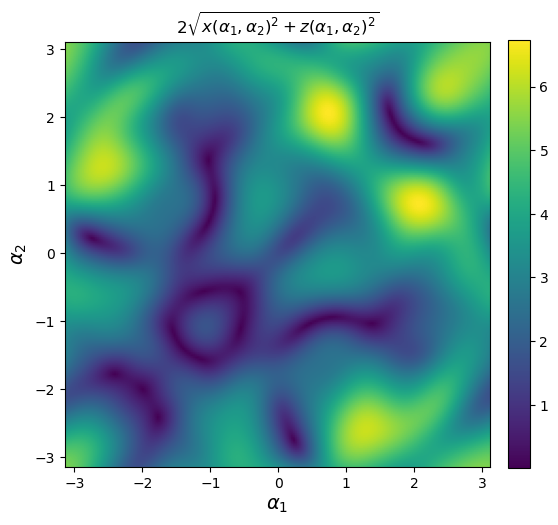

In [2]:
xf, zf, d1_xf, d1_zf, d2_xf, d2_zf = wpp3.symbolic_matrices(n = 3)
alphas = np.linspace(-np.pi, np.pi, 200, endpoint = False)
diffs = wpp3.get_spectrum_grid(alphas = alphas, xf = xf, zf = zf, plot = True)
locs = wpp3.all_point_finder(xf = xf, zf = zf, d1_xf = d1_xf, d1_zf = d1_zf, d2_xf = d2_xf, d2_zf = d2_zf)
charges = wpp3.weyl_charge_calculator(d1_xf = d1_xf, d1_zf = d1_zf, d2_xf = d2_xf, d2_zf = d2_zf, locs = locs)

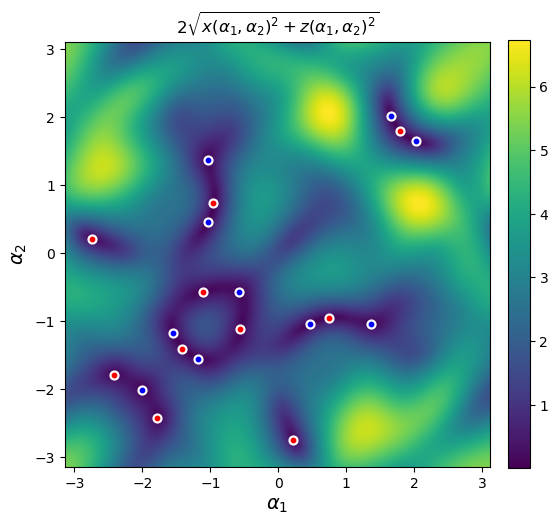

In [6]:
#create figure
fig = plt.figure( figsize = (6,6))

#plot the values (note the ::-1 !)
im = plt.imshow(diffs[::-1, :], extent = [alphas[0], alphas[-1], alphas[0], alphas[-1]])

for i in range(len(locs)):
    if charges[i] == 1:
        color = "red"
    else:
        color = "blue"
        
    plt.scatter(locs[i][0], locs[i][1], s = 40, c = "white")
    plt.scatter(locs[i][0], locs[i][1], s = 10, c = color)
#add labels 
plt.xlabel(r"$\alpha_1$", fontsize = 14)
plt.ylabel(r"$\alpha_2$", fontsize = 14)

plt.ylim([alphas[0], alphas[-1]])
#add title
plt.title(r"$2 \sqrt{x\left( \alpha_1, \alpha_2 \right)^2+z\left( \alpha_1, \alpha_2 \right)^2}$", fontsize = 12)

#rescale the colorbar
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.savefig("spectrum_grid.pdf", dpi = 500, bbox_inches='tight')

In [14]:
%%time
numstat = wpp3.obtain_42_wp_configs(number_of_random_systems = 100, n = 1, filename = "tet.txt")

CPU times: user 1min 43s, sys: 168 ms, total: 1min 43s
Wall time: 1min 43s
